In [12]:
import pandas as pd
import numpy as np
import re 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

# **Importing and Reading the Data**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [9]:
df = pd.read_csv("/Restaurant_Reviews.tsv",delimiter="\t")

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


# **WE NEED TO VISIUALIZE THE REVIEWS LIKES EITHER (1,0)**

In [ ]:
import seaborn as sns

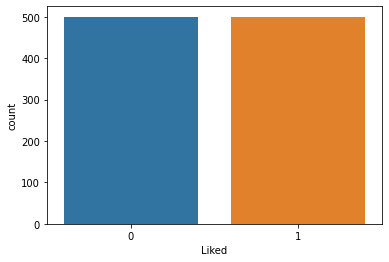

In [14]:
sns.countplot(x='Liked', data=df)
#here we found out that 500(1) and 500 (0)

***Selecting Random rows to view the data***

In [15]:
df["Review"][0]
#first row

'Wow... Loved this place.'

In [23]:
df["Review"][500]
#mid row

"I also had to taste my Mom's multi-grain pumpkin pancakes with pecan butter and they were amazing, fluffy, and delicious!"

In [18]:
df["Review"][999]
#last row

"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check."

## **CLEANING THE REVIEWS**

In [32]:
review = re.sub("[^a-zA-Z]"," ",df["Review"][0]) 
#Replace all non-[a-zA-Z] values in df["Review"][0] with " "

In [33]:
review

'Wow    Loved this place '

 *compare before and after cleaning in row onw[0]*

In [35]:
print(f'before cleaning review: {df["Review"][0]} \nClean review: {review}')

before cleaning review: Wow... Loved this place. 
Clean review: Wow    Loved this place 


*Transforming uper case to lower*

In [36]:
review = review.lower()

In [37]:
print(f'Upper case review: {df["Review"][0]} \n lower case review: {review}')

Upper case review: Wow... Loved this place. 
 lower case review: wow    loved this place 


# **Importing stop words,using stemmer in cleaning and pre-processing of the data (Lemmatization)**

In [38]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [40]:
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]

In [41]:
review

['wow', 'love', 'place']

In [42]:
print(f""" unprocessed data: {df["Review"][0]}
preprocessed data: {" ".join(review)}
""")

 unprocessed data: Wow... Loved this place.
preprocessed data: wow love place



## **After applying the cleaning on the first row only,we may now apply it on all the data.**

In [43]:
reviews = []
for i in range(len(df)):
    review = re.sub("[^a-zA-Z]"," ",df["Review"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in str(stopwords.words("english"))]
    reviews.append(" ".join(review))

In [44]:
reviews

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid happier',
 'see

## **Vectorization**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
cv = CountVectorizer(max_features = 1300)

In [55]:
X = cv.fit_transform(reviews).toarray()

In [56]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
X.shape

(1000, 1300)

In [58]:
y = df["Liked"].values

### **Applying the classification task using multiple (ML algorithms)**

***Spliting data (test/train)***

In [59]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,np.array(y),test_size=0.2,shuffle=True)

## **SVM(BEST PERFORMING MODEL WITH 79% ACCURACY PERFORMMANCE)**

In [91]:
from sklearn.svm import SVC

In [92]:
classifier_sv=SVC()

In [93]:
classifier_sv.fit(train_X,train_y)

SVC()

In [94]:
y_pred=classifier_sv.predict(test_X)

In [95]:
print("Accuracy : ",accuracy_score(test_y,y_pred))

Accuracy :  0.79


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
conf_matrix = confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[86 13]
 [29 72]]


In [98]:
import matplotlib.pyplot as plt

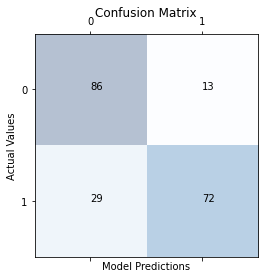

In [99]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

### **Logistic Regression** #*** **second place in accuracy**

In [73]:
from sklearn.linear_model import LogisticRegression 

In [74]:
model=LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [75]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(test_X)
print("Accuracy : ",accuracy_score(test_y,y_pred))

Accuracy :  0.775


In [76]:
conf_matrix = confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[76 23]
 [22 79]]


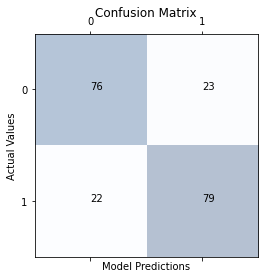

In [77]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

## **Desission Tree**

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
Class_dt= DecisionTreeClassifier()
Class_dt.fit(train_X,train_y)

DecisionTreeClassifier()

In [81]:
y_pred=Class_dt.predict(test_X)
print("Accuracy : ",accuracy_score(test_y,y_pred))

Accuracy :  0.7


In [82]:
conf_matrix = confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[63 36]
 [24 77]]


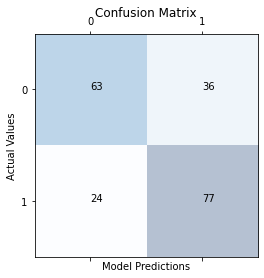

In [83]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

## **RANDOM FOREST**

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_class=RandomForestClassifier()
rf_class.fit(train_X,train_y)

RandomForestClassifier()

In [100]:
y_pred= rf_class.predict(test_X)
print("Accuracy : ",accuracy_score(test_y,y_pred))


Accuracy :  0.775


In [101]:
conf_matrix = confusion_matrix(test_y, y_pred)
print(conf_matrix)

[[71 28]
 [17 84]]


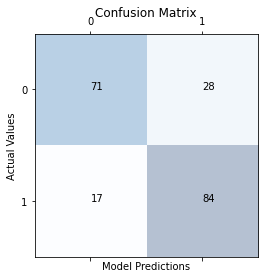

In [102]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()